# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Source, Func, Est)
from lib import (stack)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations ($\sigma = 1$)

In [2]:
nsample = 1000
σ = 1.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "npts": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = Source.MA.create_parameter_scan(*params)

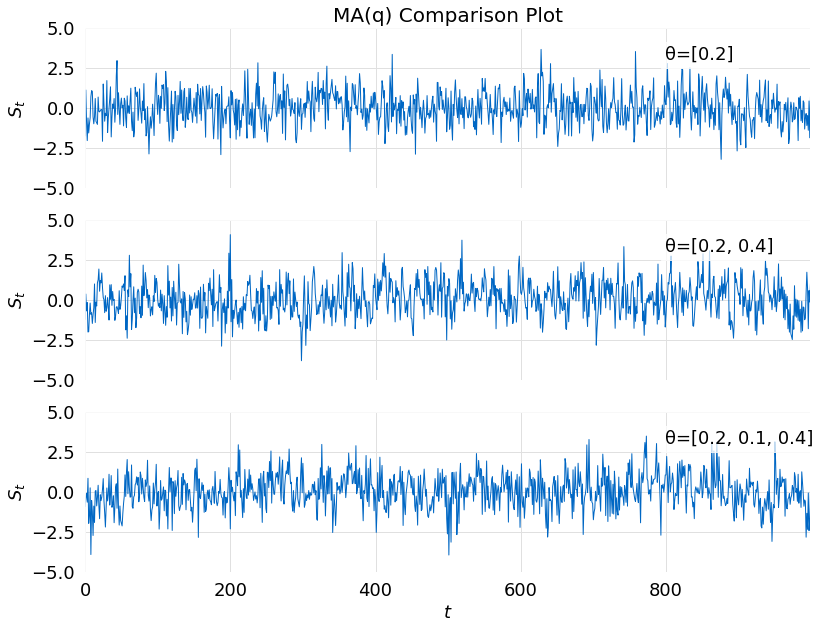

In [3]:
stack(ma, ylim=[-5.0, 5.0], title=title, labels=labels)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [4]:
results = Est.MA.perform(ma[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1437.076
Date:                Fri, 03 Jun 2022   AIC                           2880.153
Time:                        08:53:47   BIC                           2894.876
Sample:                             0   HQIC                          2885.749
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0169      0.038      0.446      0.655      -0.057       0.091
ma.L1          0.1744      0.030      5.902      0.000       0.116       0.232
sigma2         1.0369      0.046     22.686      0.000       0.947       1.126
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.81   Prob(JB):                         0.49
Heteroskedasticity (H):               0.93   Skew:                             0.09
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
ma[0].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:53:47',
 'Type': <Source.MA: 'MA'>,
 'Name': 'MA(1)-Simulation-755aef54-9a17-4dea-8880-49b78b29ea9f',
 'SchemaIterations': None,
 'MA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 1.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <Est.MA: 'MA'>,
    'Const': {'Estimate': 0.01691093917802848,
     'Error': 0.03787820562839567,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.17439976233456037,
      'Error': 0.029551331773570933,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'}],
    'Sigma2': {'Estimate': 1.0368995158289533,
     'Error': 0.045706329608033204,

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [6]:
results = Est.MA.perform(ma[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1384.626
Date:                Fri, 03 Jun 2022   AIC                           2777.252
Time:                        08:53:47   BIC                           2796.883
Sample:                             0   HQIC                          2784.714
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0681      0.052      1.308      0.191      -0.034       0.170
ma.L1          0.2599      0.030      8.786      0.000       0.202       0.318
ma.L2          0.4435      0.029     15.505      0.000       0.387       0.500
sigma2         0.9332      0.041     22.864      0.000       0.853       1.013
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.72   Prob(JB):                         0.43
Heteroskedasticity (H):               1.04   Skew:                             0.09
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
ma[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:53:47',
 'Type': <Source.MA: 'MA'>,
 'Name': 'MA(2)-Simulation-97b4e270-1e43-4e50-9200-f8995a55e490',
 'SchemaIterations': None,
 'MA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <Est.MA: 'MA'>,
    'Const': {'Estimate': 0.06813687944132268,
     'Error': 0.05208117744672048,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.25990768897345345,
      'Error': 0.029582814210936056,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.443492438267862,
      'Error': 0.028602453963577162,
    

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [8]:
results = Est.MA.perform(ma[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1388.417
Date:                Fri, 03 Jun 2022   AIC                           2786.835
Time:                        08:53:48   BIC                           2811.374
Sample:                             0   HQIC                          2796.161
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0509      0.053      0.957      0.339      -0.053       0.155
ma.L1          0.2020      0.031      6.606      0.000       0.142       0.262
ma.L2          0.1371      0.030      4.507      0.000       0.078       0.197
ma.L3          0.3930      0.029     13.471      0.000       0.336       0.450
sigma2         0.9403      0.040     23.558      0.000       0.862       1.018
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.26
Prob(Q):                              0.96   Prob(JB):                         0.20
Heteroskedasticity (H):               1.06   Skew:                            -0.01
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ma[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:53:47',
 'Type': <Source.MA: 'MA'>,
 'Name': 'MA(3)-Simulation-907a1055-7246-40c6-a713-afde83cab2fa',
 'SchemaIterations': None,
 'MA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 1.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <Est.MA: 'MA'>,
    'Const': {'Estimate': 0.0509354854687562,
     'Error': 0.053248373382642565,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.20198834557684642,
      'Error': 0.030574476074494126,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.1371262882185808,
      'Error': 0.030422081453144637

## Simulations ($\sigma = 5$)

In [11]:
nsample = 1000
σ = 5.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "npts": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = Source.MA.create_parameter_scan(*params)

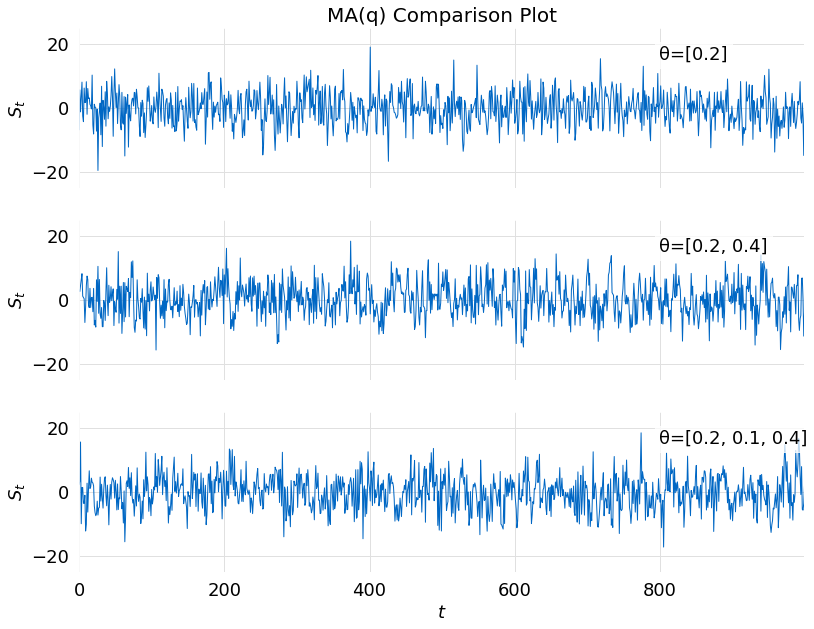

In [12]:
stack(ma, ylim=[-25.0, 25.0], title=title, labels=labels)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [13]:
results = Est.MA.perform(ma[0], order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3017.426
Date:                Fri, 03 Jun 2022   AIC                           6040.853
Time:                        08:54:28   BIC                           6055.576
Sample:                             0   HQIC                          6046.449
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0746      0.187     -0.398      0.690      -0.442       0.293
ma.L1          0.1972      0.031      6.357      0.000       0.136       0.258
sigma2        24.4577      1.023     23.899      0.000      22.452      26.464
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.76   Prob(JB):                         0.12
Heteroskedasticity (H):               0.78   Skew:                            -0.07
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ma[0].attrs

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [14]:
results = Est.MA.perform(ma[1], order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3024.876
Date:                Fri, 03 Jun 2022   AIC                           6057.752
Time:                        08:54:40   BIC                           6077.383
Sample:                             0   HQIC                          6065.213
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1920      0.253      0.759      0.448      -0.304       0.688
ma.L1          0.2026      0.030      6.808      0.000       0.144       0.261
ma.L2          0.4013      0.030     13.367      0.000       0.342       0.460
sigma2        24.8146      1.120     22.154      0.000      22.619      27.010
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.73   Prob(JB):                         0.67
Heteroskedasticity (H):               0.98   Skew:                             0.07
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
ma[1].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:54:22',
 'Type': <Source.MA: 'MA'>,
 'Name': 'MA(2)-Simulation-c5915dc1-72c2-42ce-95fb-834e6faa9390',
 'SchemaIterations': None,
 'MA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <Est.MA: 'MA'>,
    'Const': {'Estimate': 0.1919880810150525,
     'Error': 0.25306758594893114,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.20263054463311395,
      'Error': 0.029762937656888793,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.4013005417361791,
      'Error': 0.030022361656484555,
    

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [17]:
results = Est.MA.perform(ma[2], order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3009.953
Date:                Fri, 03 Jun 2022   AIC                           6029.905
Time:                        08:54:53   BIC                           6054.444
Sample:                             0   HQIC                          6039.232
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1980      0.258     -0.767      0.443      -0.704       0.308
ma.L1          0.2102      0.030      7.109      0.000       0.152       0.268
ma.L2          0.0767      0.031      2.479      0.013       0.016       0.137
ma.L3          0.3746      0.031     12.254      0.000       0.315       0.434
sigma2        24.0836      1.053     22.861      0.000      22.019      26.148
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.80   Prob(JB):                         0.80
Heteroskedasticity (H):               1.11   Skew:                             0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
ma[2].attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '03/06/2022 08:54:22',
 'Type': <Source.MA: 'MA'>,
 'Name': 'MA(3)-Simulation-87cec5fd-e384-453a-9114-0affd74345a6',
 'SchemaIterations': None,
 'MA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 5.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <Est.MA: 'MA'>,
    'Const': {'Estimate': -0.19801159759225098,
     'Error': 0.2580559322747174,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.21021248134918186,
      'Error': 0.029568292846169054,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.07667323391156326,
      'Error': 0.03093083111953928